# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- ~~Data Import: Import the dataset into a statistical software tool such as Python or R.~~
- ~~Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.~~

- ~~Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.~~
- ~~Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.~~
- ~~Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.~~
- ~~Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.~~
- ~~Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.~~
- ~~Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.~~

In [52]:
import pandas as pd

# Load the dataset
file_path = 'c:/users/spencer.fargey/lighthouselabs/projects/UnsupervisedLearning/Wholesale_Data.csv'
df = pd.read_csv(file_path)

# Preview the first few rows
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Check for Missing Values and run Summary Statistics

Update: 
- No null or missing values in the dataset
- Summary statistic show nothing out of the ordinary... some stores have very low sales in certain categories, other than that pretty straightforward


In [53]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types and basic info about the dataset
df.info()

# Display summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# EDA - View Distribution of Numerical and Ordinal Columns - check for outliers

- Looks like disproportionate sampling of each channel and region from our ordinal data
- All numerical sales data is skewed heavily to the right

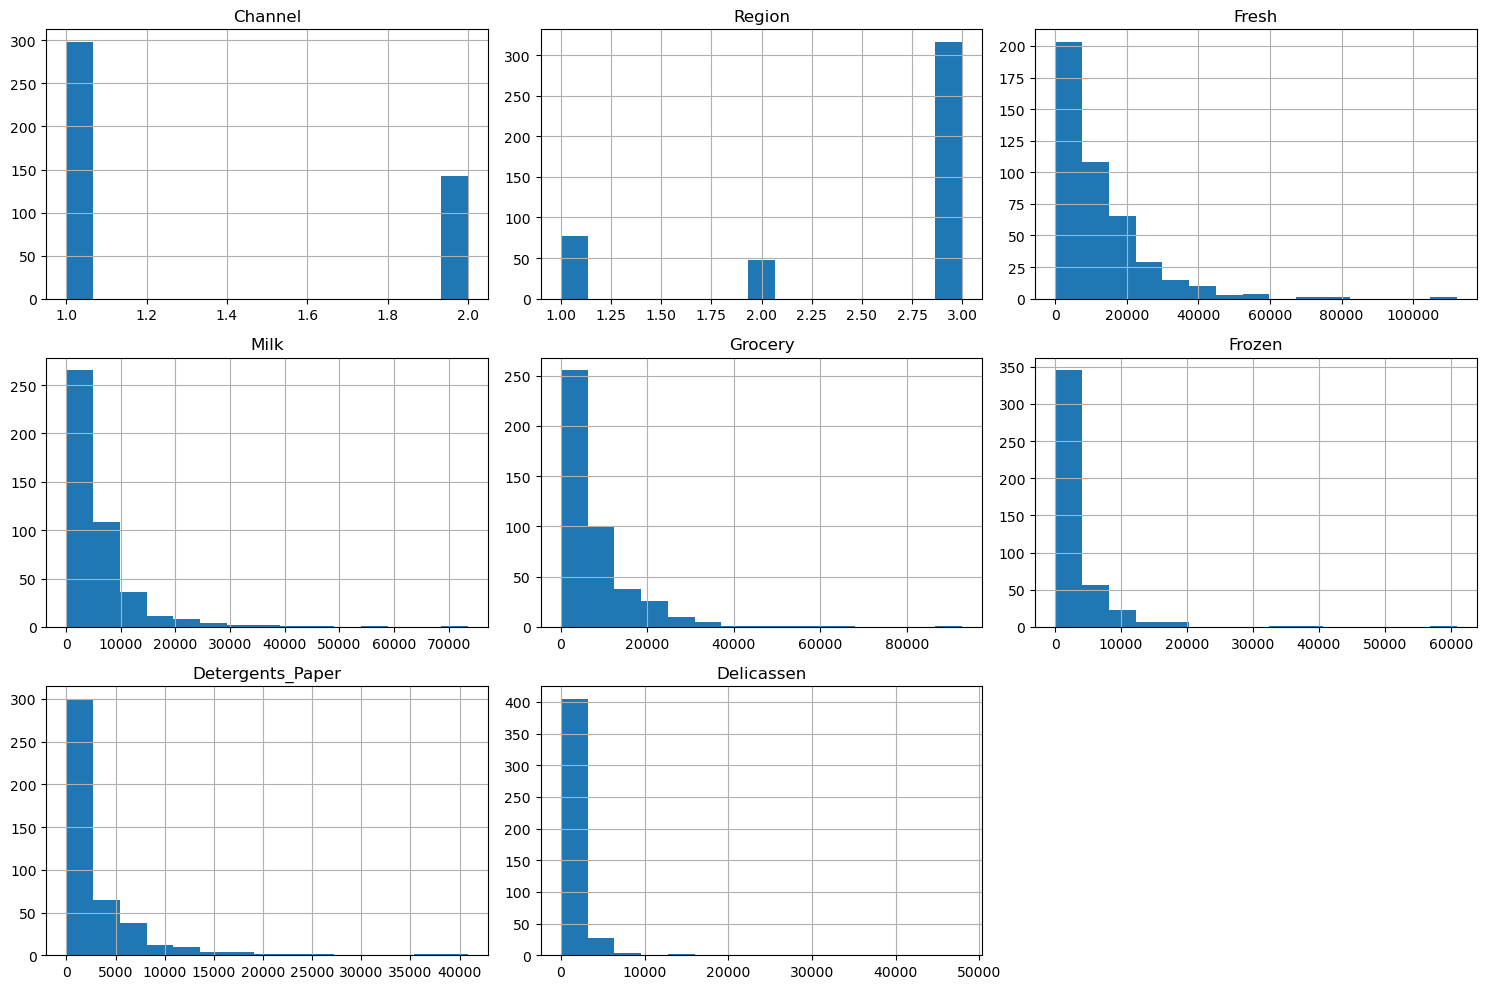

In [54]:
import matplotlib.pyplot as plt

df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


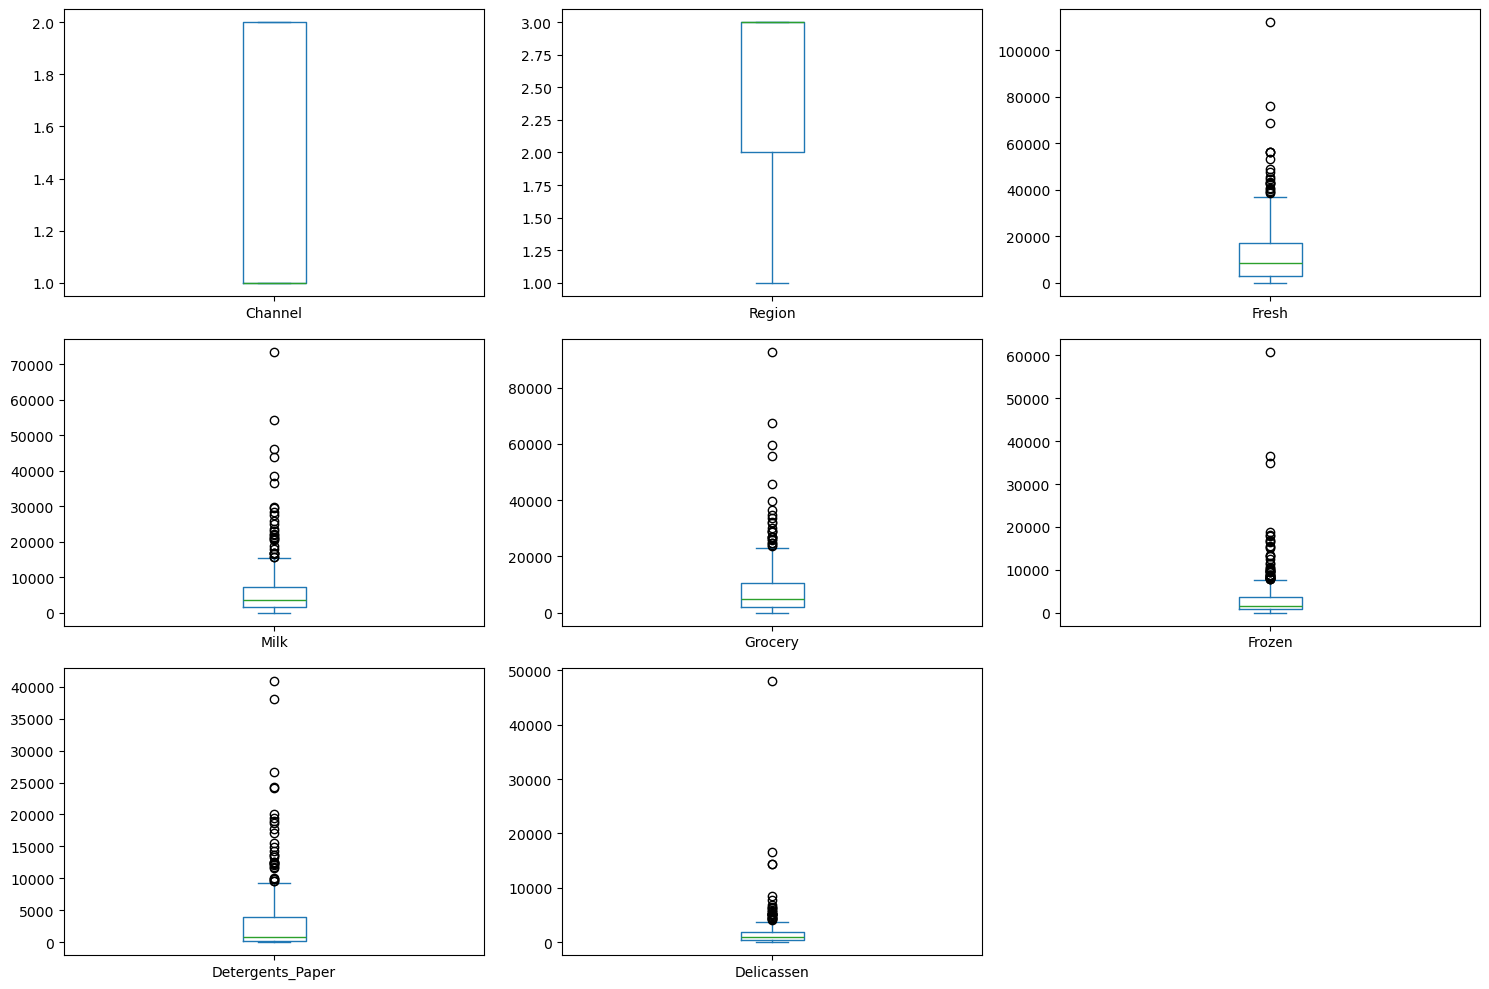

In [55]:
# Box plot for each feature
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


Scatterplot for every variable:
    looks like positive relationships between:
- milk and grocery
- detergents and grocery

Seems like Delecassen has a pretty negative relatonship between most numerical categories

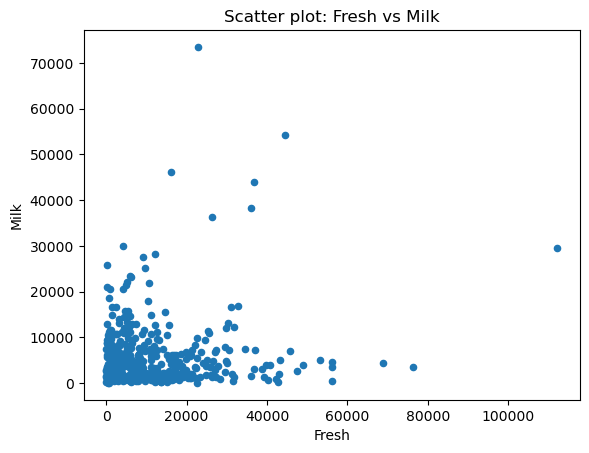

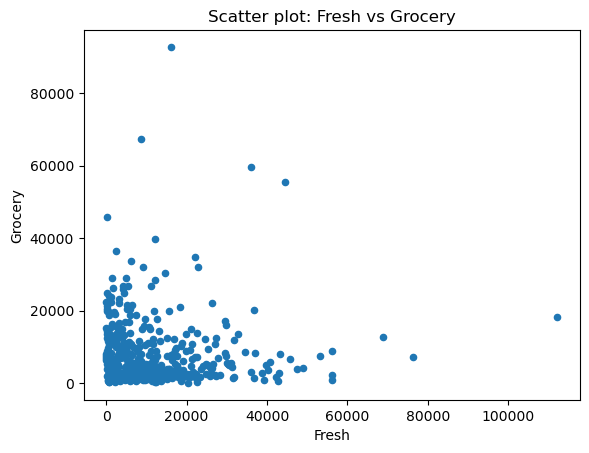

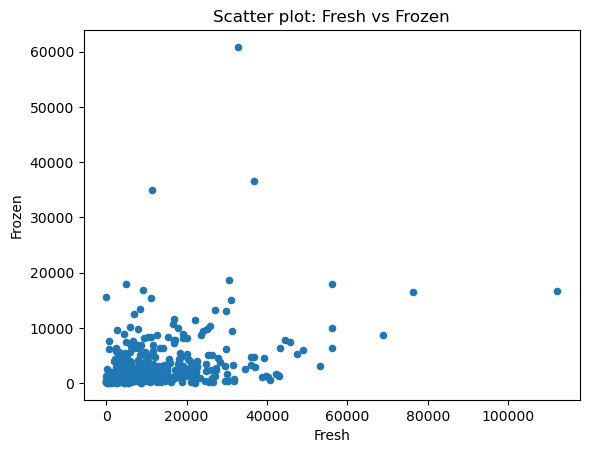

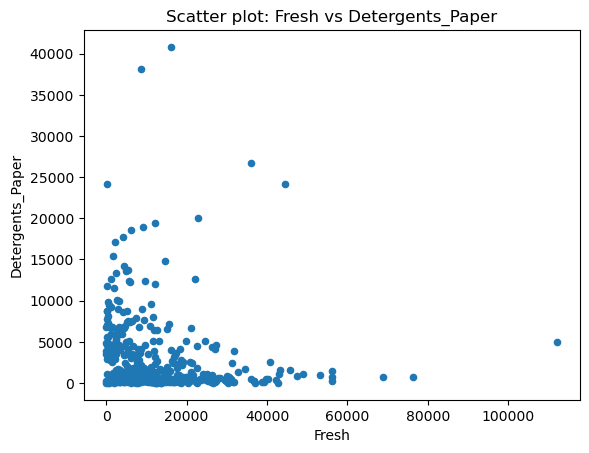

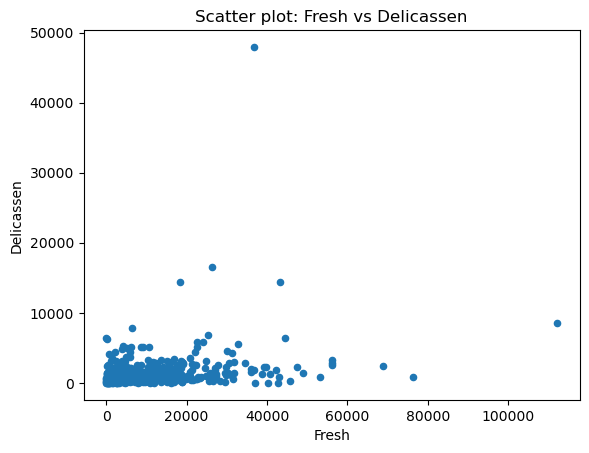

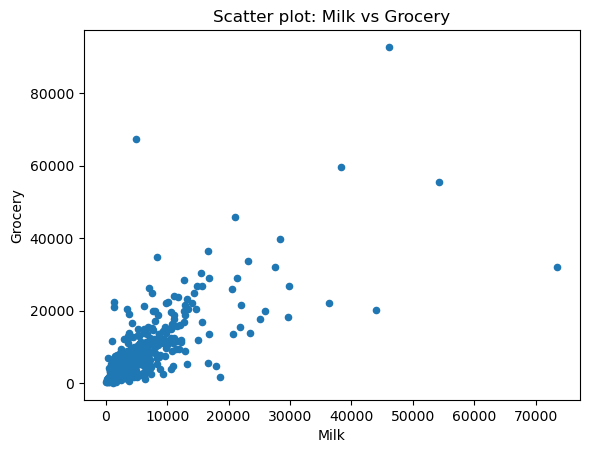

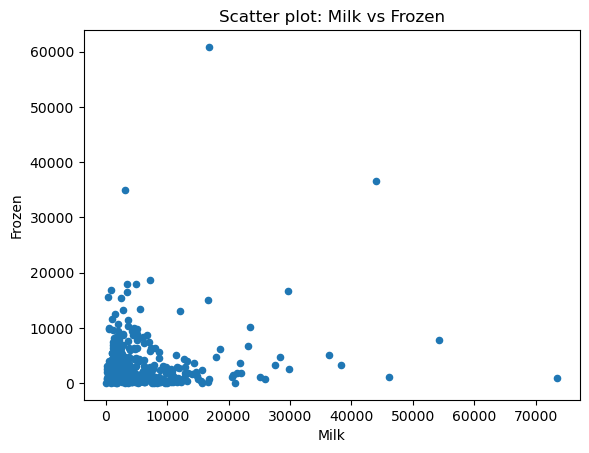

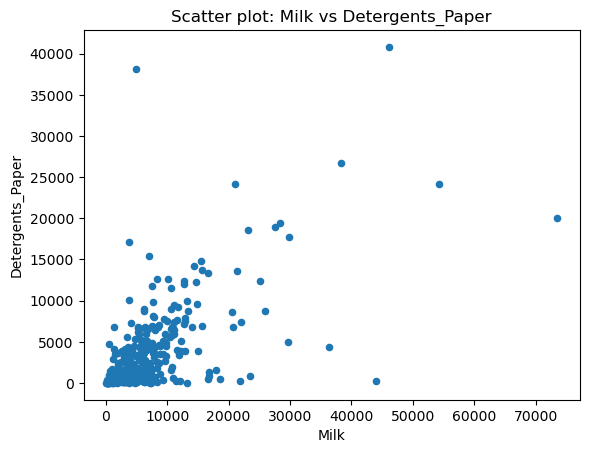

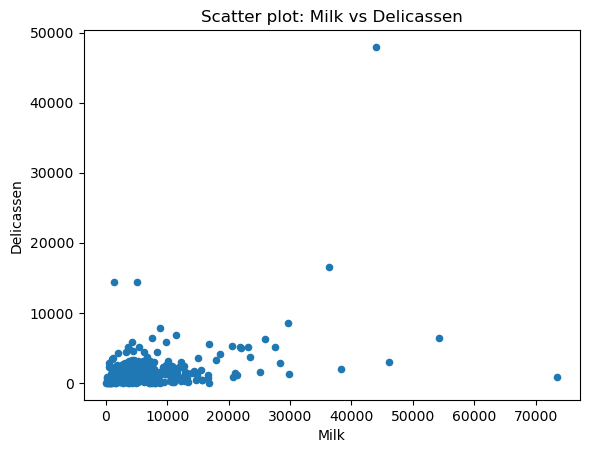

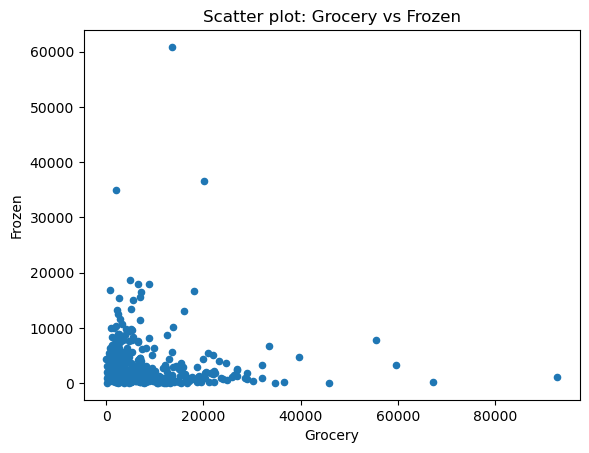

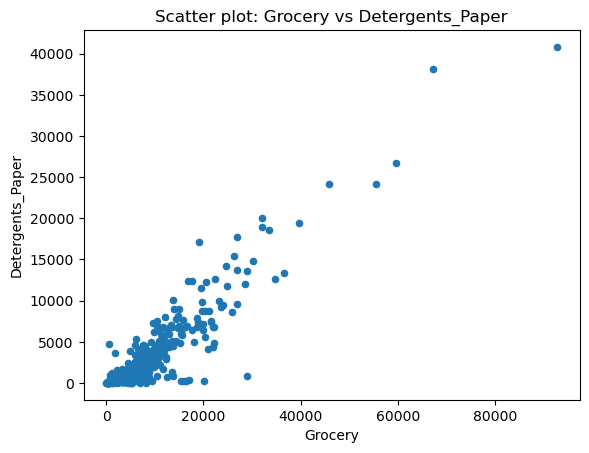

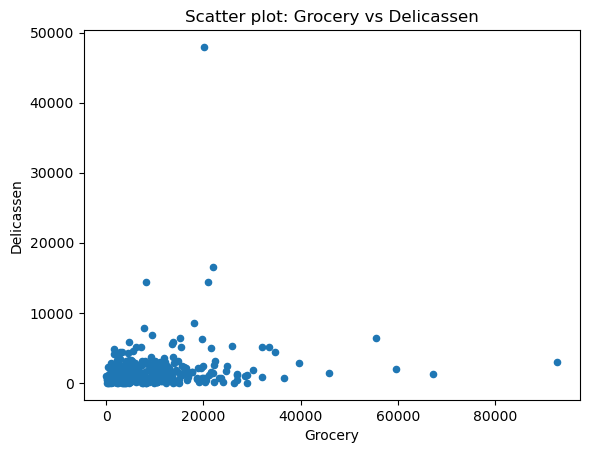

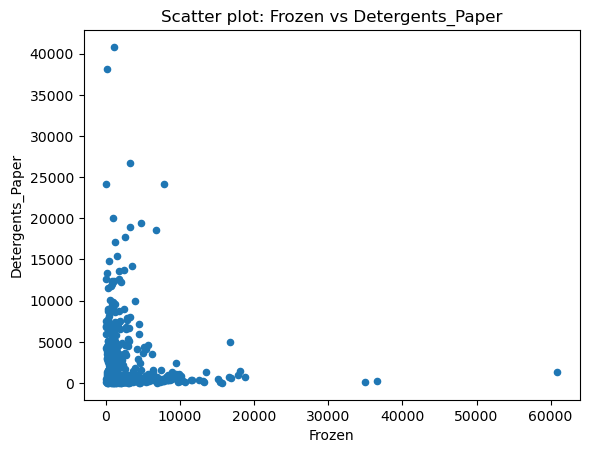

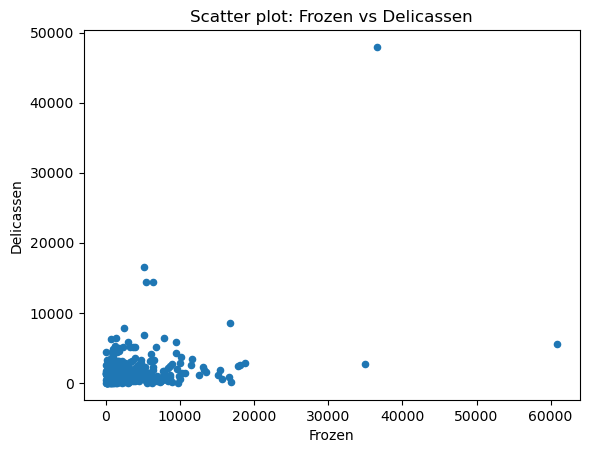

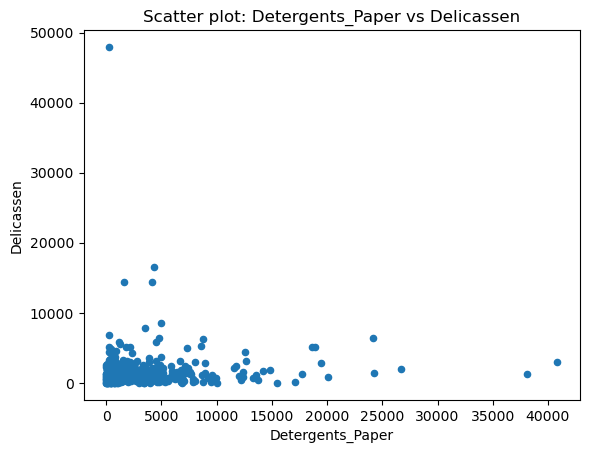

In [86]:
import matplotlib.pyplot as plt

# Let's create scatter plots for every pair of numerical columns to check their relationships
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Loop over pairs of numerical columns and plot scatter plots
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        df.plot(kind='scatter', x=col1, y=col2)
        plt.title(f"Scatter plot: {col1} vs {col2}")
        plt.show()


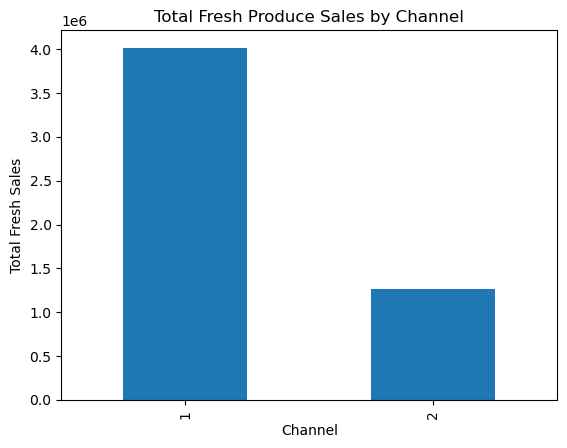

In [87]:
# Compare Fresh produce sales by Channel
df.groupby('Channel')['Fresh'].sum().plot(kind='bar')
plt.title("Total Fresh Produce Sales by Channel")
plt.xlabel('Channel')
plt.ylabel('Total Fresh Sales')
plt.show()


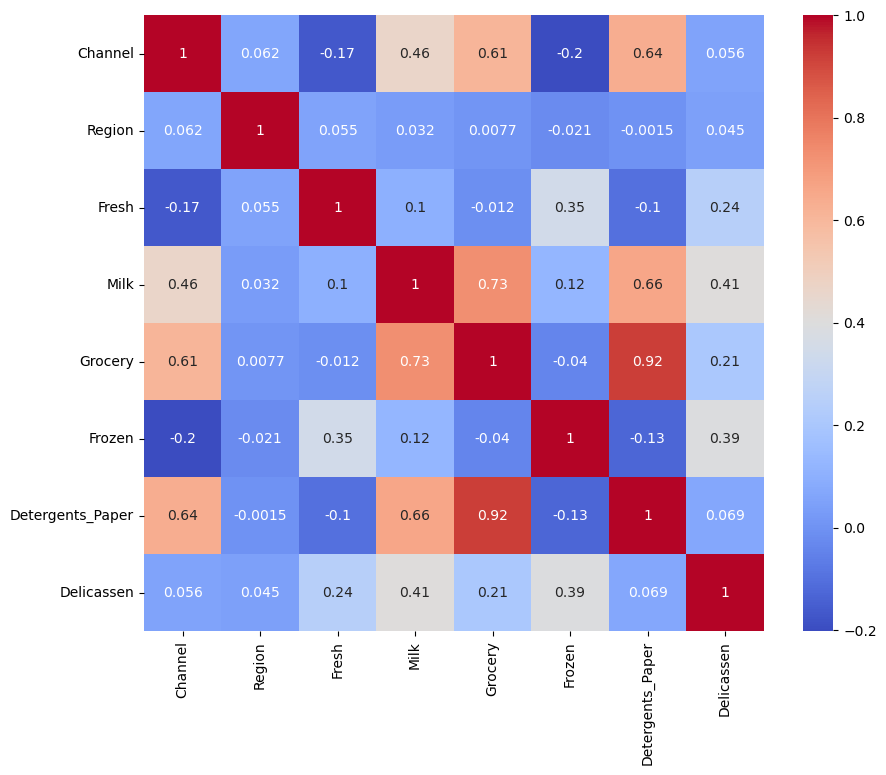

In [73]:
# Correlation matrix
correlation_matrix = df.corr()

# Display a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [88]:
# Group by 'Channel' and calculate the mean spending for Grocery and Detergents_Paper
channel_means = df.groupby('Channel')[['Grocery', 'Detergents_Paper']].mean()
print(channel_means)


              Grocery  Detergents_Paper
Channel                                
1         3962.137584        790.560403
2        16322.852113       7269.507042


In [90]:
from scipy.stats import ttest_ind

# Split data by channel
channel_1 = df[df['Channel'] == 1]
channel_2 = df[df['Channel'] == 2]

# Perform t-tests to compare means for Grocery and Detergents_Paper
tstat_grocery, pvalue_grocery = ttest_ind(channel_1['Grocery'], channel_2['Grocery'])
tstat_detergents, pvalue_detergents = ttest_ind(channel_1['Detergents_Paper'], channel_2['Detergents_Paper'])

print(f"T-test for Grocery: t-stat = {tstat_grocery}, p-value = {pvalue_grocery}")
print(f"T-test for Detergents_Paper: t-stat = {tstat_detergents}, p-value = {pvalue_detergents}")


T-test for Grocery: t-stat = -16.060255767614525, p-value = 5.695744747791741e-46
T-test for Detergents_Paper: t-stat = -17.249720568386078, p-value = 2.954116665783402e-51


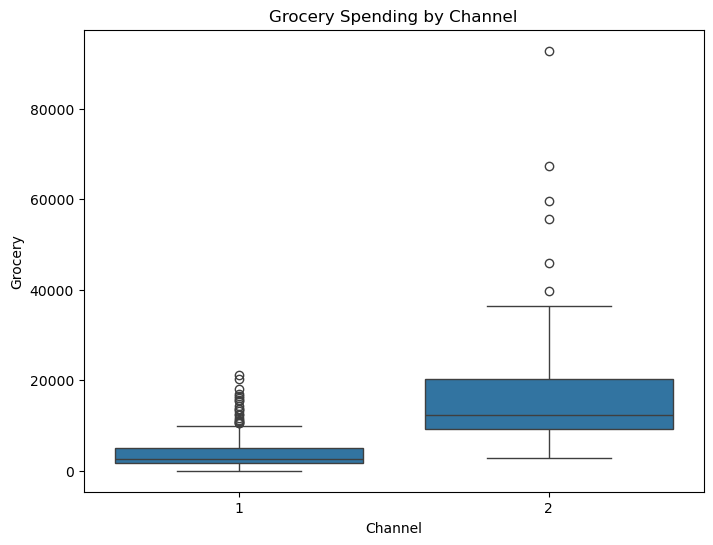

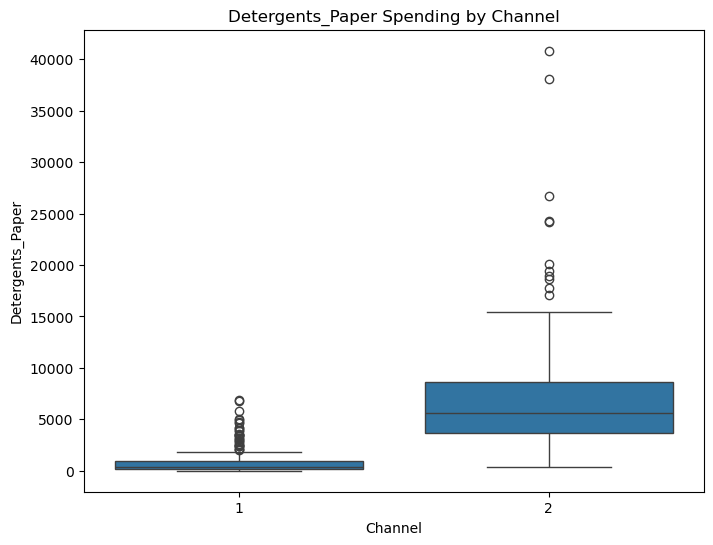

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare Grocery spending across Channels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel', y='Grocery', data=df)
plt.title('Grocery Spending by Channel')
plt.show()

# Boxplot to compare Detergents_Paper spending across Channels
plt.figure(figsize=(8, 6))
sns.boxplot(x='Channel', y='Detergents_Paper', data=df)
plt.title('Detergents_Paper Spending by Channel')
plt.show()


In [74]:
from sklearn.preprocessing import StandardScaler

# Isolate the numerical columns
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_numerical = df[numerical_columns]

# Scale the numerical data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)

# Concatenate the categorical variables back
df_scaled_full = pd.concat([df[['Channel', 'Region']], df_scaled], axis=1)

# Display the first few rows of the scaled data
df_scaled_full.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [59]:
# Applying PCA to reduce dimensions (using 2 components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio to see how much information is captured by the principal components
explained_variance = pca.explained_variance_ratio_

# Show the first few rows of the PCA result
df_pca_head = df_pca.head()

explained_variance, df_pca_head

(array([0.44082893, 0.283764  ]),
         PC1       PC2
 0  0.193291 -0.305100
 1  0.434420 -0.328413
 2  0.811143  0.815096
 3 -0.778648  0.652754
 4  0.166287  1.271434)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

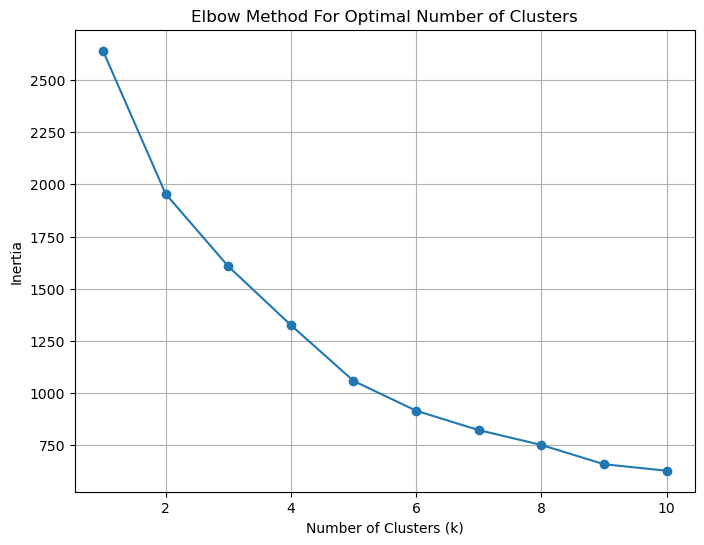

In [61]:
# Define the cluster range and re-calculate the inertia values for the Elbow Method
cluster_range = range(1, 11)

# Re-calculate inertia values for the defined cluster range
inertia = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph again with the corrected cluster range
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\spencer.fargey\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


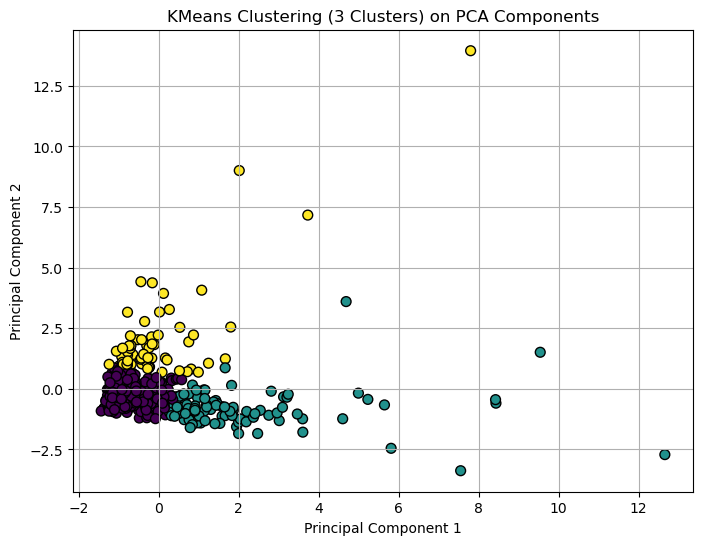

In [76]:
from sklearn.cluster import KMeans

# Perform KMeans clustering with 3 clusters as per elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add the cluster assignments to the PCA DataFrame
df_pca['Cluster'] = clusters

# Visualize the clusters using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'],  c=df_pca['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('KMeans Clustering (3 Clusters) on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

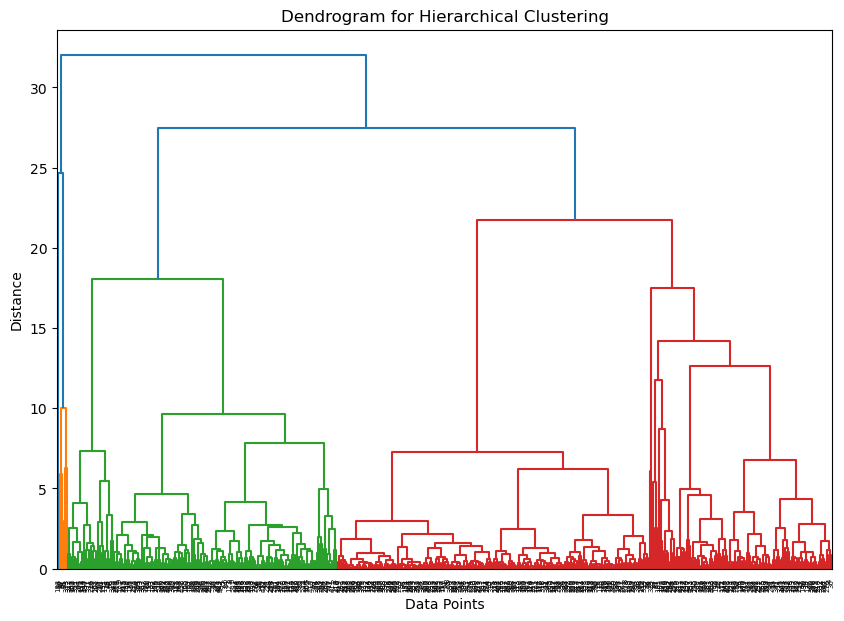

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering using 'ward' linkage method
Z = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


In [79]:
from scipy.cluster.hierarchy import fcluster

# Assuming you already have performed hierarchical clustering and have the linkage matrix `Z`
# Cut the dendrogram at the height that corresponds to 3 clusters
cluster_labels = fcluster(Z, t=3, criterion='maxclust')

# Add the cluster labels to your original DataFrame
df['Hierarchical_Cluster'] = cluster_labels

# Check the first few rows to see the assigned clusters
print(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen', 'Hierarchical_Cluster']].head())


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0  12669  9656     7561     214              2674        1338   
1   7057  9810     9568    1762              3293        1776   
2   6353  8808     7684    2405              3516        7844   
3  13265  1196     4221    6404               507        1788   
4  22615  5410     7198    3915              1777        5185   

   Hierarchical_Cluster  
0                     2  
1                     2  
2                     2  
3                     3  
4                     3  


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Standardize the numerical columns
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])


In [81]:
# Apply PCA
pca = PCA(n_components=len(numerical_columns))  # We start with the same number of components as features
principal_components = pca.fit_transform(df_scaled)

# Convert the PCA results into a DataFrame for easier analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(numerical_columns))])

# Display the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
print(explained_variance)


Explained Variance Ratio for each Principal Component:
[0.44082893 0.283764   0.12334413 0.09395504 0.04761272 0.01049519]


In [82]:
# Display the PCA component loadings
pca_loadings = pd.DataFrame(pca.components_, columns=numerical_columns, index=[f'PC{i+1}' for i in range(len(numerical_columns))])
print("PCA Loadings (Component Weights):")
print(pca_loadings)


PCA Loadings (Component Weights):
        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
PC1  0.042884  0.545118  0.579256  0.051189          0.548640    0.248682
PC2  0.527932  0.083168 -0.146088  0.611278         -0.255233    0.504207
PC3 -0.812257  0.060388 -0.108384  0.178386         -0.136192    0.523904
PC4 -0.236686 -0.087190  0.105987  0.768683          0.171744   -0.552065
PC5 -0.048683  0.826579 -0.314999 -0.027932         -0.339640   -0.314701
PC6 -0.036025 -0.038040  0.721745 -0.015637         -0.685894   -0.075134


# Part V - Conclusion

``Correlation:``
 - High Correlation Between Grocery and Detergents_Paper (0.92):

 - There is a very strong positive correlation between Grocery and Detergents_Paper. This suggests that customers who spend more on groceries also tend to spend significantly more on detergent and paper products. These product categories might often be purchased together.
Strong Correlation Between Milk and Grocery (0.73):

 - The correlation between Milk and Grocery is quite strong (0.73). This indicates that customers who spend more on milk generally also have higher grocery spending, which reflects typical consumer behavior in household shopping.


The Channel shows positive correlation with both Grocery (0.61) and Detergents_Paper (0.64) and milk. This suggests that channel 2 is associated with higher spending in these categories.

Distinct Customer Clusters: The clustering analysis (e.g., KMeans or hierarchical clustering) identified distinct customer groups, with one group characterized by high spending across all categories (Fresh, Milk, Grocery), while others focus more on specific product categories like Fresh produce or Frozen goods.

Channel 1 Dominates Fresh Produce Sales: Analysis of the Channel variable revealed that Channel 1 customers tend to have significantly higher fresh produce purchases, suggesting that this channel serves customers more focused on fresh products.


ALthough we have seen from the raw data that their are 2 channels, it seems like with our hierarchial clustering and our k-clustering there are 3 distinct buying patterns as shown and kMeans plot. 




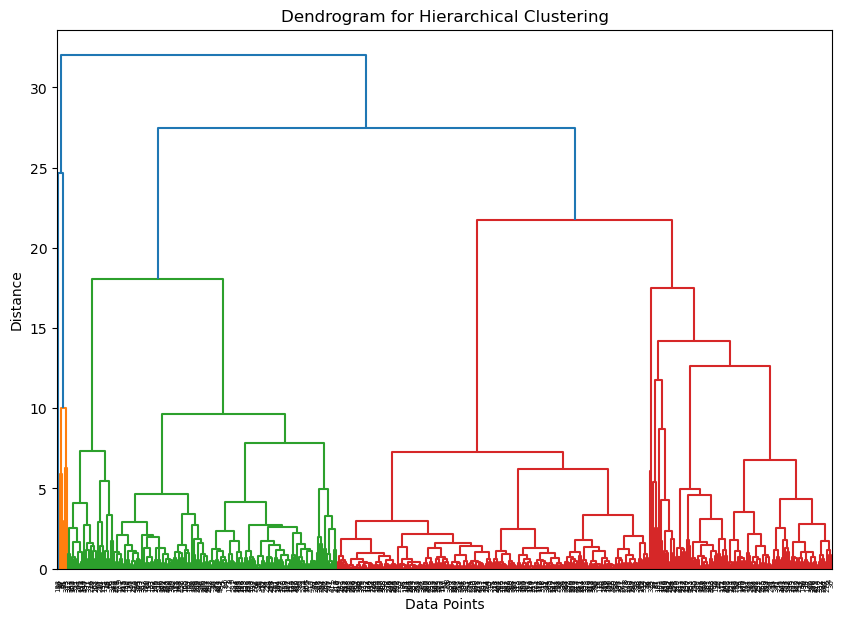

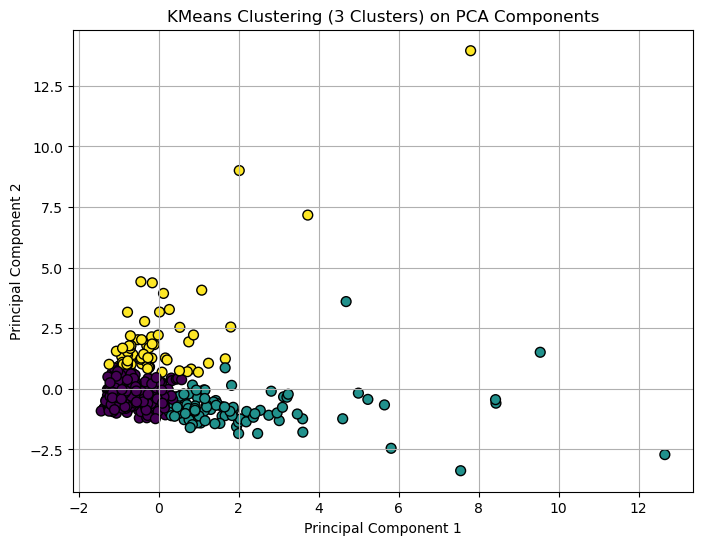